**Data Processing**

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
df=pd.read_csv('IMDb Movies India.csv',encoding='latin1')

In [9]:
df.shape

(15509, 10)

In [10]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [12]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [13]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [14]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [17]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [18]:
#removing min part of the string
df['Duration']=df['Duration'].str.strip('min')

In [19]:
#coverting year into integer
df['Year']=df['Year'].str.strip('()').astype(int)

In [20]:
#converting votes into integer
df['Votes']=df['Votes'].str.replace(',','').astype('int')

In [21]:
#Removing duplicated rows based on Name and Year
df.drop_duplicates(subset=['Name','Year'], keep='first',inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5657 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5657 non-null   object 
 1   Year      5657 non-null   int32  
 2   Duration  5657 non-null   object 
 3   Genre     5657 non-null   object 
 4   Rating    5657 non-null   float64
 5   Votes     5657 non-null   int32  
 6   Director  5657 non-null   object 
 7   Actor 1   5657 non-null   object 
 8   Actor 2   5657 non-null   object 
 9   Actor 3   5657 non-null   object 
dtypes: float64(1), int32(2), object(7)
memory usage: 442.0+ KB


In [23]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [24]:
df['Genre'].unique()

array(['Drama', 'Comedy, Romance', 'Comedy, Drama, Musical',
       'Drama, Romance, War', 'Horror, Mystery, Thriller',
       'Action, Crime, Thriller', 'Horror', 'Horror, Romance, Thriller',
       'Comedy, Drama, Romance', 'Comedy, Drama', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Comedy, Horror', 'Drama, Horror, Mystery',
       'Action, Thriller', 'Action', 'Horror, Mystery, Romance',
       'Horror, Mystery', 'Drama, Horror, Romance',
       'Action, Drama, History', 'Action, Drama, War', 'Thriller',
       'Comedy', 'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'Drama, History', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Adventure, Drama', 'Comedy, Mystery, Thriller', 'Drama, Romance',
       'Crime, Thriller', 'Horror, Sci-Fi, Thriller',
       'Drama, Mystery, Thriller', 'Drama, Family, Musical',
       'Action, Comedy', 'Action, Adventure, Fantasy', 'Documentary',
       'Drama, Horro

In [25]:
df['Genre'].value_counts()

Drama                              844
Drama, Romance                     332
Action, Crime, Drama               328
Action, Drama                      206
Comedy, Drama                      205
                                  ... 
Comedy, Crime, Musical               1
History, Romance                     1
Drama, History, Sport                1
Animation, Comedy, Drama             1
Documentary, Biography, Musical      1
Name: Genre, Length: 376, dtype: int64

In [26]:
#dropping Genre column
df.drop('Genre',axis=1,inplace=True)

In [27]:
df['Rating'].max()

10.0

In [28]:
df.loc[df['Rating']==df['Rating'].max()]

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


In [29]:
df.loc[df['Rating']==df['Rating'].min()]

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12171,Sadak 2,2020,133,1.1,67785,Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt


In [30]:
df.loc[df['Votes']==df['Votes'].max()]

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8219,Life of Pi,2012,127,7.9,591417,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain


**Data Visualization**

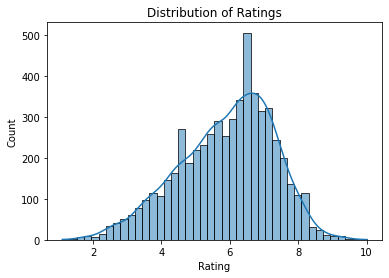

In [31]:
sns.histplot(data=df,x='Rating', kde=True)
plt.title('Distribution of Ratings')
plt.show()

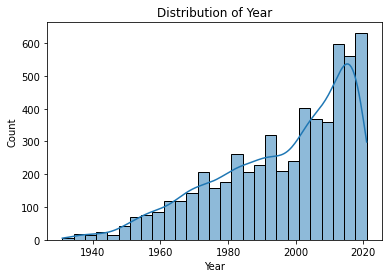

In [32]:
sns.histplot(data=df,x='Year', kde=True)
plt.title('Distribution of Year')
plt.show()

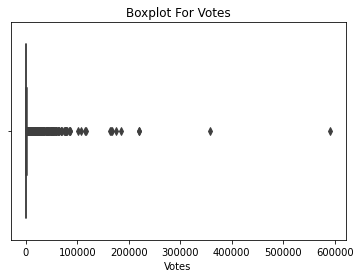

In [33]:
sns.boxplot(x='Votes',data=df)
plt.title("Boxplot For Votes")
plt.show()

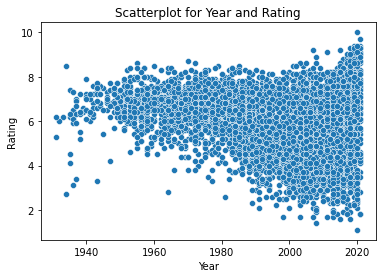

In [51]:
sns.scatterplot(x=df['Year'],y=df['Rating'],data=df)
plt.title('Scatterplot for Year and Rating')
plt.show()

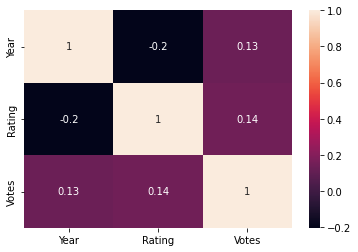

In [35]:
crr=df.corr()
sns.heatmap(crr,annot=True)
plt.show()

**Feature Engineering**

In [36]:
X = df[['Year','Votes']]
y = df['Rating']

In [37]:
X.head()

,Year,Votes
1,2019,8
3,2019,35
5,1997,827
6,2005,1086
8,2012,326


In [38]:
y.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1000)

In [60]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = linear_model.predict(X_test)

In [63]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)


Mean Squared Error: 1.8288608868310918
R2 Score: 0.07252622428919553
Mean Absolute Error: 1.0796658676169457


In [64]:
y_pred

array([6.30057461, 5.58085292, 6.04113859, ..., 5.94545751, 5.85006497,
       5.55487526])

In [65]:
y_test

4637     6.2
4075     7.1
8091     6.8
6145     6.8
11725    8.1
        ... 
14903    2.9
10763    4.8
15426    5.4
4221     5.1
9388     5.8
Name: Rating, Length: 1415, dtype: float64

Mean Squared Error: 1.8288608868310918


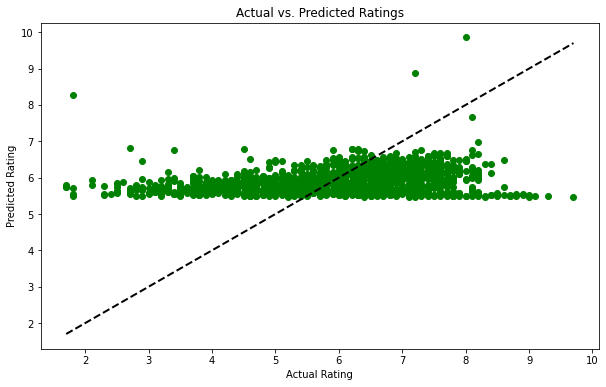

In [66]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


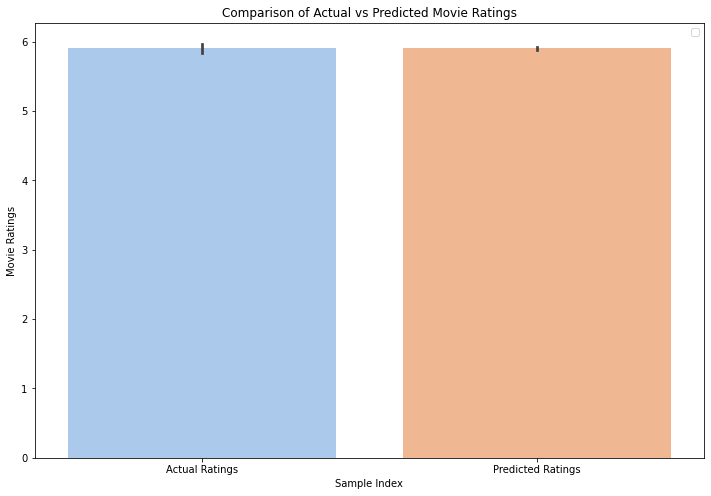

In [67]:
result_df = pd.DataFrame({'Actual Ratings': y_test, 'Predicted Ratings': y_pred})

# Plot the actual and predicted ratings
plt.figure(figsize=(12, 8))
sns.barplot(data=result_df, palette='pastel')

plt.xlabel('Sample Index')
plt.ylabel('Movie Ratings')
plt.title('Comparison of Actual vs Predicted Movie Ratings')
plt.legend(loc='upper right')
plt.show()